In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
df = pd.read_excel('houses.xlsx')
df.head()

,Price (HUF),Size,Rooms,Address
0,250 000,100 sqm,"1 living room(s), 4 bedroom(s), 1 bathroom(s)","Debrecen, Péchy"
1,150 000,60 sqm,"1 living room(s), 2 bedroom(s), 1 bathroom(s)","Debrecen, Sánta Kálmán"
2,150 000,75 sqm,"1 living room(s), 1 bedroom(s), 1 bathroom(s)","Debrecen, Bajcsy Zsilinszky"
3,55 900 000,86 sqm,"1 living room(s), 3 bedroom(s), 1 bathroom(s)","Debrecen, Salétrom"
4,165 000,50 sqm,"1 living room(s), 1 bedroom(s), 1 bathroom(s)","Debrecen, Apafi"


In [137]:
df[['Living_rooms', 'Bedrooms', 'Bathrooms']] = df.Rooms.str.split(',', expand=True)

In [138]:
df.head()

,Price (HUF),Size,Rooms,Address,Living_rooms,Bedrooms,Bathrooms
0,250 000,100 sqm,"1 living room(s), 4 bedroom(s), 1 bathroom(s)","Debrecen, Péchy",1 living room(s),4 bedroom(s),1 bathroom(s)
1,150 000,60 sqm,"1 living room(s), 2 bedroom(s), 1 bathroom(s)","Debrecen, Sánta Kálmán",1 living room(s),2 bedroom(s),1 bathroom(s)
2,150 000,75 sqm,"1 living room(s), 1 bedroom(s), 1 bathroom(s)","Debrecen, Bajcsy Zsilinszky",1 living room(s),1 bedroom(s),1 bathroom(s)
3,55 900 000,86 sqm,"1 living room(s), 3 bedroom(s), 1 bathroom(s)","Debrecen, Salétrom",1 living room(s),3 bedroom(s),1 bathroom(s)
4,165 000,50 sqm,"1 living room(s), 1 bedroom(s), 1 bathroom(s)","Debrecen, Apafi",1 living room(s),1 bedroom(s),1 bathroom(s)


In [139]:
df['Price (HUF)'] = df['Price (HUF)'].str.replace(' ','').str.strip()
df['Price (HUF)'] = df['Price (HUF)'].astype(int)
df['Size'] = df['Size'].str[:-3].str.strip().str.replace('-', 'NONE').str.replace('m2','').str.replace(',','.')
df['Size'].replace(['NONE', '?'], np.nan, inplace=True)
df['Size'] = df['Size'].astype(float)
df.drop(columns='Rooms', inplace=True)
df['Living_rooms'] = df['Living_rooms'].str[:-14].str.strip()
df['Living_rooms'] = df['Living_rooms'].astype(int)
df['Bedrooms'] = df['Bedrooms'].str[:-10].str.strip()
df['Bedrooms'] = df['Bedrooms'].astype(int)
df['Bathrooms'] = df['Bathrooms'].str[:-11].str.strip()
df['Bathrooms'] = df['Bathrooms'].astype(int)

In [140]:
df1 = df.loc[df['Price (HUF)'] < 1_000_000]

In [141]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 0 to 666
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price (HUF)   638 non-null    int32  
 1   Size          618 non-null    float64
 2   Address       638 non-null    object 
 3   Living_rooms  638 non-null    int32  
 4   Bedrooms      638 non-null    int32  
 5   Bathrooms     638 non-null    int32  
dtypes: float64(1), int32(4), object(1)
memory usage: 24.9+ KB


In [142]:
# df1.to_excel(r'C:\Users\youse\Desktop\Data Analysis Portfolio\Python\Data Scraping\houses_cleaned.xlsx', index=False, header=['Price (HUF)', 'Size', 'Address', 'Living_rooms', 'Bedrooms', 'Bathrooms'])

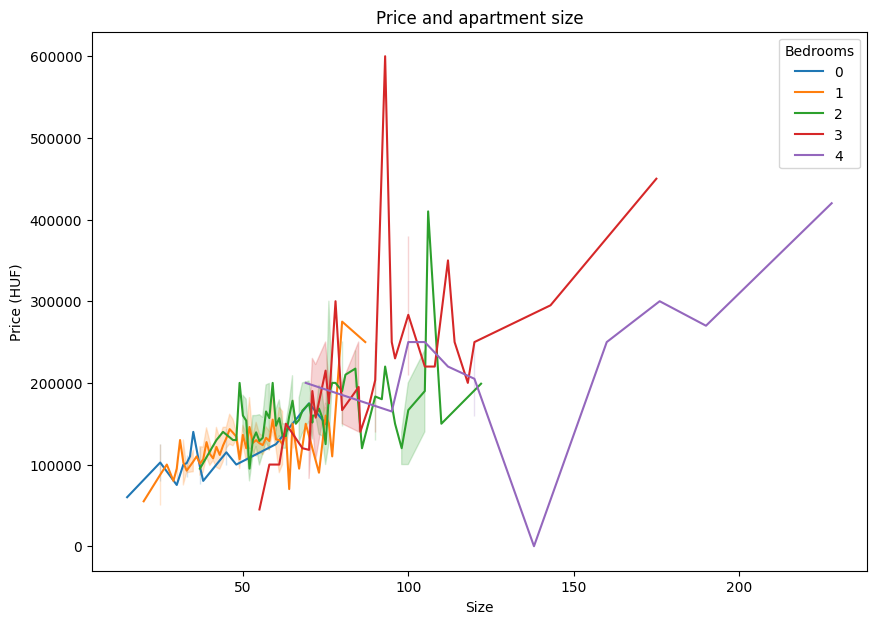

In [152]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df1, x='Size', y='Price (HUF)', hue='Bedrooms', palette='tab10')
plt.title('Price and apartment size')
plt.show()

In [155]:
corr = df1.corr(numeric_only=True)
corr

,Price (HUF),Size,Living_rooms,Bedrooms,Bathrooms
Price (HUF),1.000000,0.581951,0.128051,0.465018,0.189792
Size,0.581951,1.000000,0.093198,0.720117,0.454167
Living_rooms,0.128051,0.093198,1.000000,-0.230761,0.030326
Bedrooms,0.465018,0.720117,-0.230761,1.000000,0.353392
Bathrooms,0.189792,0.454167,0.030326,0.353392,1.000000


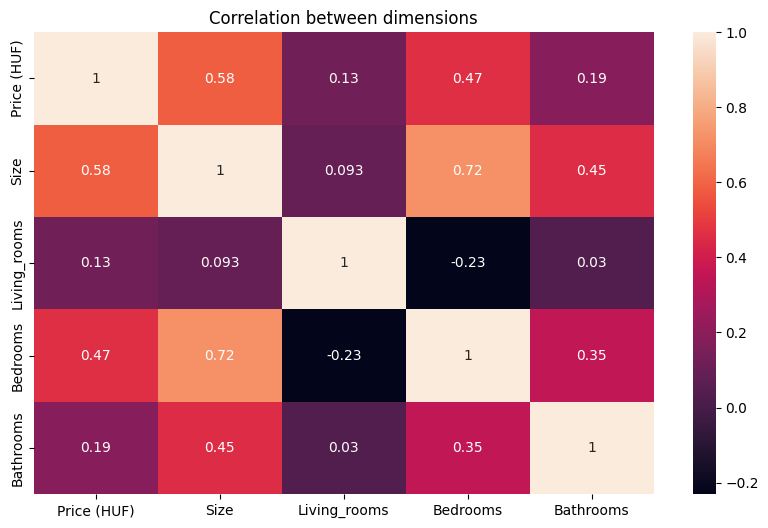

In [161]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)
plt.title('Correlation between dimensions')
plt.show()